In [54]:
import numpy as np
import pandas as pd
import pylab as plt
import random, datetime
from matplotlib import collections as matcoll
#from adjustText import adjust_text
%matplotlib inline

In [4]:
df = pd.read_csv('Theatrical_releases_adapting_Marvel_superheroes.csv')
df.drop([0, 1, 2], axis=0, inplace=True)
#I'm only looking at post-2000s Marvel movies, as there were 
#only 3 made in the prior 15 years (which throws off the scaling of the graphs)
df['Film'] = df['Film'].astype(str)
df_MCU = df[df['MCU'] == True]
df_non_MCU = df[df['MCU'] == False]
#These two will be the separate subplots comparing MCU vs non-MCU projects
df.head(10)

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
3,X-Men,7/14/2000,"$157,299,718","$139,039,810",296339528,75000000,False,NaN,Twentieth Century Fox,PG-13,...,X-Men,53%,3.95,82,Male,2000,"$523,605,788","$132,518,380","$187,500,000",Success
4,Blade II,3/22/2002,"$82,348,319","$72,661,713",155010032,54000000,False,NaN,New Line Cinema,R,...,Blade,53%,2.87,57,Male,2002,"$262,166,167","$91,329,399","$135,000,000",Success
5,Spider-Man,5/3/2002,"$407,022,860","$418,002,176",825025036,139000000,False,NaN,Sony Pictures Entertainment,PG-13,...,Spider-Man,49%,5.94,90,Male,2002,"$1,395,352,599","$235,088,637","$347,500,000",Success
6,Daredevil,2/14/2003,"$102,543,518","$76,636,200",179179718,78000000,False,NaN,Twentieth Century Fox,PG-13,...,Daredevil,57%,2.30,43,Male,2003,"$296,291,387","$128,980,715","$195,000,000",Flop
7,X2,4/30/2003,"$214,949,694","$192,761,855",407711549,110000000,False,NaN,Twentieth Century Fox,PG-13,...,X-Men,53%,3.71,85,Male,2003,"$674,191,374","$181,895,880","$275,000,000",Success
8,Hulk,6/20/2003,"$132,177,234","$113,107,931",245285165,137000000,False,NaN,Universal Pictures,PG-13,...,Hulk,54%,1.79,63,Male,2003,"$405,603,282","$226,543,051","$342,500,000",Flop
9,The Punisher,4/16/2004,"$33,810,189","$20,889,916",54700105,33000000,False,NaN,Lions Gate Films,R,...,Punisher,62%,1.66,29,Male,2004,"$88,105,740","$53,153,269","$82,500,000",Flop
10,Spider-Man 2,6/30/2004,"$373,585,825","$415,390,628",788976453,200000000,False,NaN,Sony Pictures Entertainment,PG-13,...,Spider-Man,47%,3.94,93,Male,2004,"$1,270,808,424","$322,141,027","$500,000,000",Success
11,Blade: Trinity,12/8/2004,"$52,411,906","$79,565,998",131977904,65000000,False,NaN,New Line Cinema,R,...,Blade,40%,2.03,24,Male,2004,"$212,577,488","$104,695,834","$162,500,000",Flop
12,Elektra,1/14/2005,"$24,409,722","$32,585,924",56995646,43000000,False,NaN,Twentieth Century Fox,PG-13,...,Daredevil,43%,1.33,11,Female,2005,"$88,794,781","$66,990,653","$107,500,000",Flop


In [5]:
df.dtypes
#These data types are a mess and I have no idea why this is...
#All of these object data types were a mess to work around, lots of things needed to be converted to lists

Film                                             object
U.S. release date                                object
Box office gross Domestic (U.S. and Canada )     object
Box office gross Other territories               object
Box office gross Worldwide                        int64
Budget                                            int64
MCU                                                bool
Phase                                           float64
Distributor                                      object
MPAA Rating                                      object
Length                                           object
Minutes                                           int64
Source                                           object
Character Family                                 object
Domestic %                                       object
Gross to Budget                                 float64
Rotten Tomatoes Critic Score                      int64
Male/Female-led                                 

In [6]:
date_time = ['7/14/2000','3/22/2002','5/3/2002','2/14/2003','4/30/2003','6/20/2003'
,'4/16/2004'
,'6/30/2004'
,'12/8/2004'
,'1/14/2005'
,'7/8/2005'
,'5/26/2006'
,'2/16/2007'
,'5/1/2007'
,'6/15/2007'
,'5/2/2008'
,'6/13/2008'
,'12/5/2008'
,'5/1/2009'
,'5/7/2010'
,'5/6/2011'
,'6/3/2011'
,'7/22/2011'
,'2/17/2012'
,'5/4/2012'
,'7/3/2012'
,'5/3/2013'
,'7/26/2013'
,'11/8/2013'
,'4/4/2014'
,'5/2/2014'
,'5/23/2014'
,'8/1/2014'
,'5/1/2015'
,'7/17/2015'
,'8/7/2015'
,'2/12/2016'
,'5/6/2016'
,'5/27/2016'
,'11/4/2016'
,'3/3/2017'
,'5/5/2017'
,'7/7/2017'
,'11/3/2017'
,'2/16/2018'
,'4/27/2018'
,'5/18/2018'
,'7/6/2018'
,'10/5/2018'
,'12/14/2018'
,'3/8/2019'
,'4/26/2019'
,'6/7/2019'
,'7/2/2019'
,'8/28/2020'
,'7/9/2021'
,'9/3/2021'
,'10/1/2021'
,'11/5/2021'
,'12/17/2021'
,'4/1/2022'
,'5/6/2022'
,'7/8/2022'
,'11/11/2022'
,'2/17/2023'
,'5/5/2023'
,'6/2/2023'
,'11/10/2023'
]
MCU_datetime = df_MCU['U.S. release date'].tolist()
non_MCU_datetime = df_non_MCU['U.S. release date'].tolist()
date_time = pd.to_datetime(date_time)
MCU_datetime = pd.to_datetime(MCU_datetime)
non_MCU_datetime = pd.to_datetime(non_MCU_datetime)
date_time = pd.to_datetime(date_time)
data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,
       44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68]
#Speaking of data type issues... this mess
#No matter what format settings I use in excel, this column will not be converted to anything that can be used on the x-axis
#This is ugly, but it was what I used to get to my midterm visualization

In [7]:
df['U.S. release date'] = data
df = df.set_index(date_time)

In [8]:
dfmoney = df[['Film','Budget','Box office gross Worldwide']].copy()
dfmoney.head()

,Film,Budget,Box office gross Worldwide
2000-07-14,X-Men,75000000,296339528
2002-03-22,Blade II,54000000,155010032
2002-05-03,Spider-Man,139000000,825025036
2003-02-14,Daredevil,78000000,179179718
2003-04-30,X2,110000000,407711549


In [9]:
dfmoney.tail(20)

,Film,Budget,Box office gross Worldwide
2018-10-05,Venom,100000000,856085151
2018-12-14,Spider-Man: Into the Spider-Verse,90000000,384298736
2019-03-08,Captain Marvel,152000000,1131416446
2019-04-26,Avengers: Endgame,356000000,2799439100
2019-06-07,Dark Phoenix,200000000,252442974
2019-07-02,Spider-Man: Far From Home,160000000,1131927996
2020-08-28,The New Mutants,67000000,49169594
2021-07-09,Black Widow,247500000,379751655
2021-09-03,Shang-Chi and the Legend of the Ten Rings,200000000,432243292
2021-10-01,Venom: Let There Be Carnage,110000000,506863592


<Axes: title={'center': 'Marvel Movie Earnings'}>

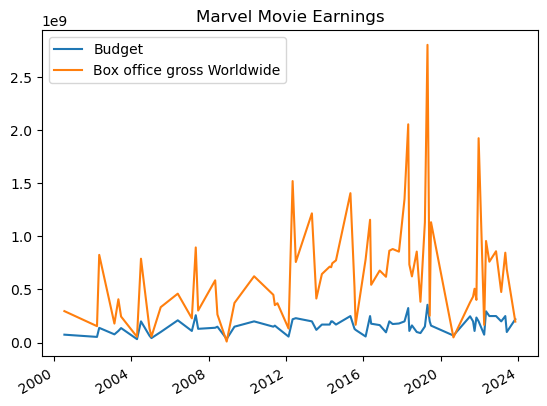

In [10]:
dfmoney.plot(title='Marvel Movie Earnings')

In [11]:
dfscore = df[['Film','Rotten Tomatoes Critic Score']].copy()
dfscore.head()

,Film,Rotten Tomatoes Critic Score
2000-07-14,X-Men,82
2002-03-22,Blade II,57
2002-05-03,Spider-Man,90
2003-02-14,Daredevil,43
2003-04-30,X2,85


<Axes: title={'center': 'Marvel Movie Scores'}>

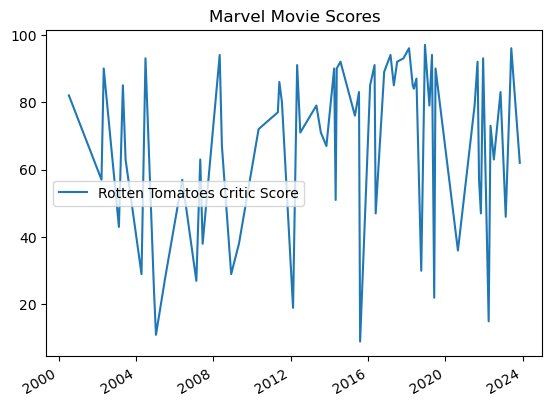

In [12]:
dfscore.plot(title='Marvel Movie Scores')
#These two graphs were what I had for the midterm report, and they at least gave me a place to start

In [13]:
global_gross = df['Box office gross Worldwide'].tolist()
budget = df['Budget'].tolist()
ratings = df['Rotten Tomatoes Critic Score'].tolist()
ratings_scaled = [25000000 * x for x in ratings]
#ratings needed to be scaled to fit in the later graph
y1 = global_gross
y2 = budget
y3 = ratings_scaled
x = date_time
film = df['Film'].tolist()
n = film

In [14]:
ym1 = df_MCU['Box office gross Worldwide'].tolist()
ym2 = df_MCU['Budget'].tolist()
ratingsm = df_MCU['Rotten Tomatoes Critic Score'].tolist()
ratingsm_scaled = [25000000 * x for x in ratingsm]
ym3 = ratingsm_scaled
xm = MCU_datetime
nm = df_MCU['Film'].tolist()

ynm1 = df_non_MCU['Box office gross Worldwide'].tolist()
ynm2 = df_non_MCU['Budget'].tolist()
ratingsnm = df_non_MCU['Rotten Tomatoes Critic Score'].tolist()
ratingsnm_scaled = [25000000 * x for x in ratingsnm]
ynm3 = ratingsnm_scaled
xnm = non_MCU_datetime
nnm = df_non_MCU['Film'].tolist()

In [101]:
ygb = df['Gross to Budget'].tolist()
ygbm = df_MCU['Gross to Budget'].tolist()

In [15]:
df_fixed = pd.DataFrame({'x':date_time, 'y':y1}, 
                  index=df['Film'])

In [16]:
df_fixed

,x,y
Film,,
X-Men,2000-07-14,296339528
Blade II,2002-03-22,155010032
Spider-Man,2002-05-03,825025036
Daredevil,2003-02-14,179179718
X2,2003-04-30,407711549
...,...,...
Black Panther: Wakanda Forever,2022-11-11,859208836
Ant-Man and the Wasp: Quantumania,2023-02-17,476071180
Guardians of the Galaxy Vol. 3,2023-05-05,845555777


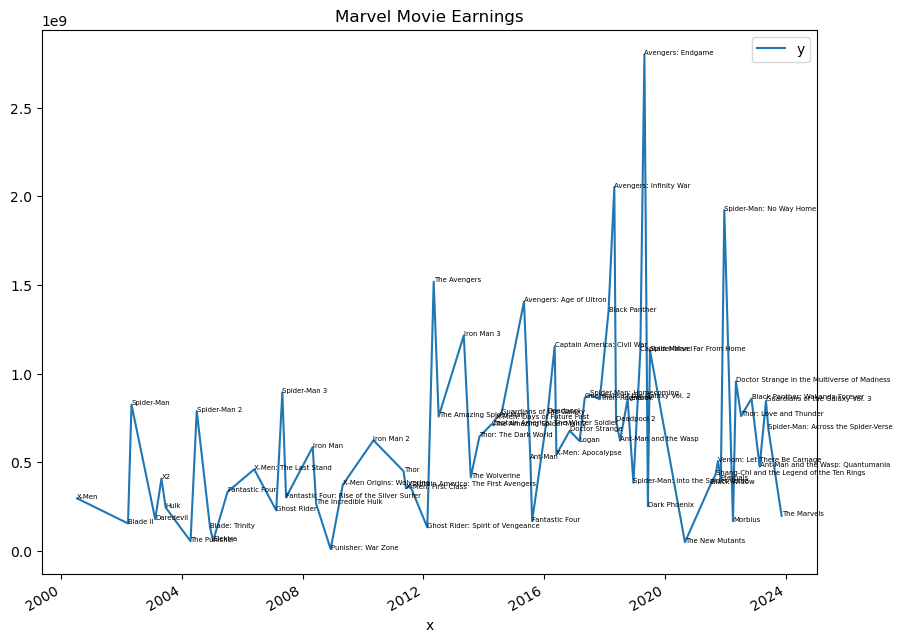

In [17]:
fig, ax = plt.subplots()
df_fixed.plot('x', 'y', kind='line', ax=ax, figsize=(10,8), title='Marvel Movie Earnings')

for k, v in df_fixed.iterrows():
    ax.annotate(k, v, family='sans-serif', fontsize=5)
#This is one way I tried to get some kind of graph going, but the pandas-based plotting is a bit limited

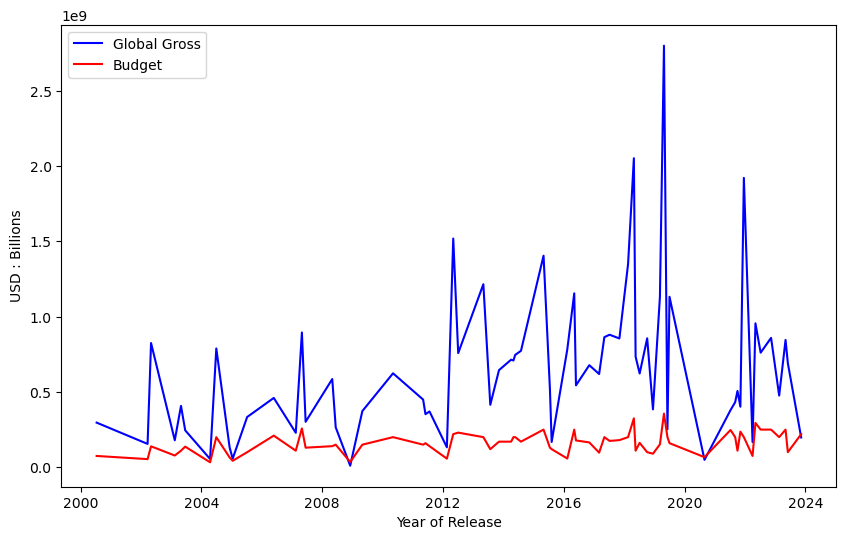

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x, y1, "-b", label="Global Gross")
plt.plot(x, y2, "-r", label="Budget")
plt.legend(loc="upper left")
plt.xlabel("Year of Release")
plt.ylabel("USD : Billions")
plt.show()

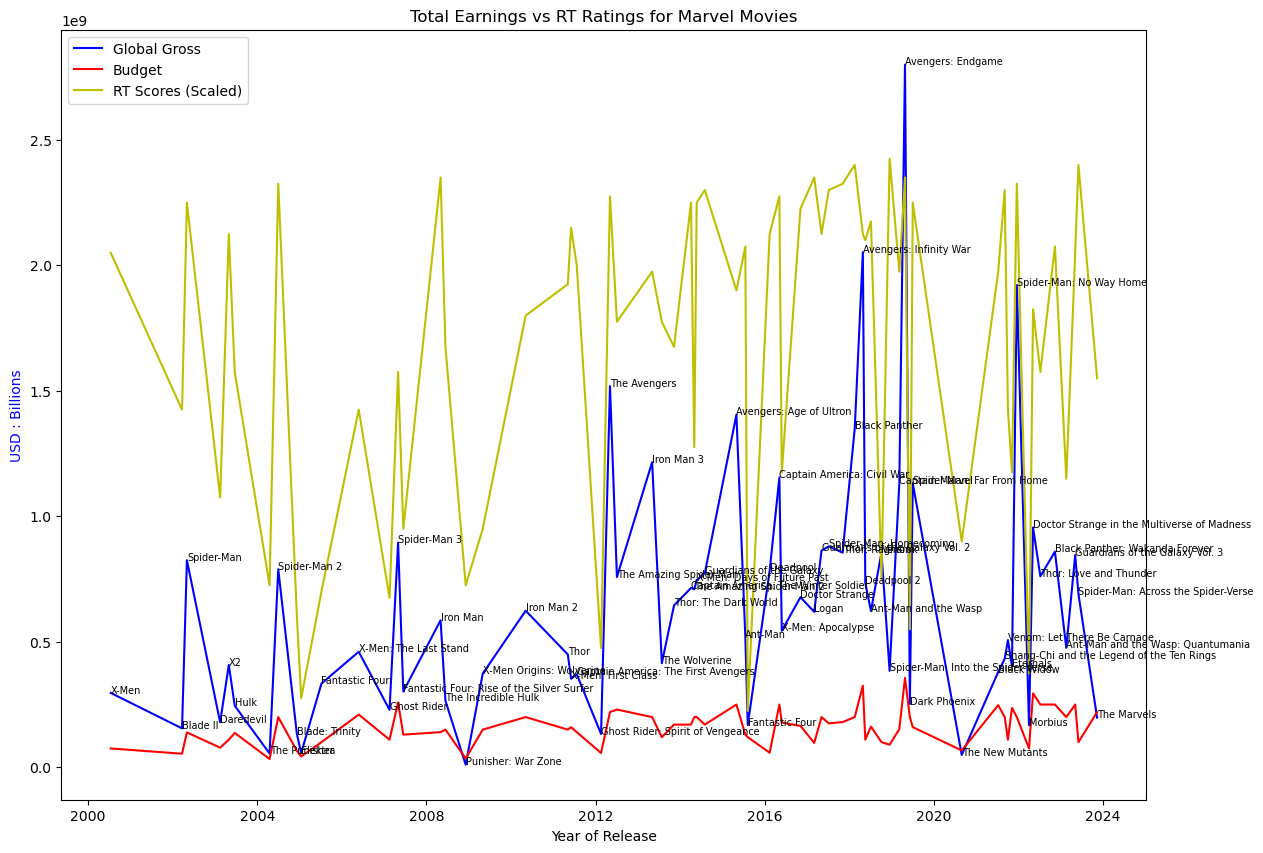

In [47]:
plt.figure(figsize=(14,10))
plt.plot(x, y1, "-b", label="Global Gross")
plt.plot(x, y2, "-r", label="Budget")
plt.plot(x, y3, "-y", label="RT Scores (Scaled)")
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y1[i]), size="7")
plt.legend(loc="upper left")
plt.xlabel("Year of Release")
plt.ylabel("USD : Billions", color='blue')
plt.title('Total Earnings vs RT Ratings for Marvel Movies')
plt.show()
#Now this is looking more like what I want, these are my 3 main data points I'm focusing on

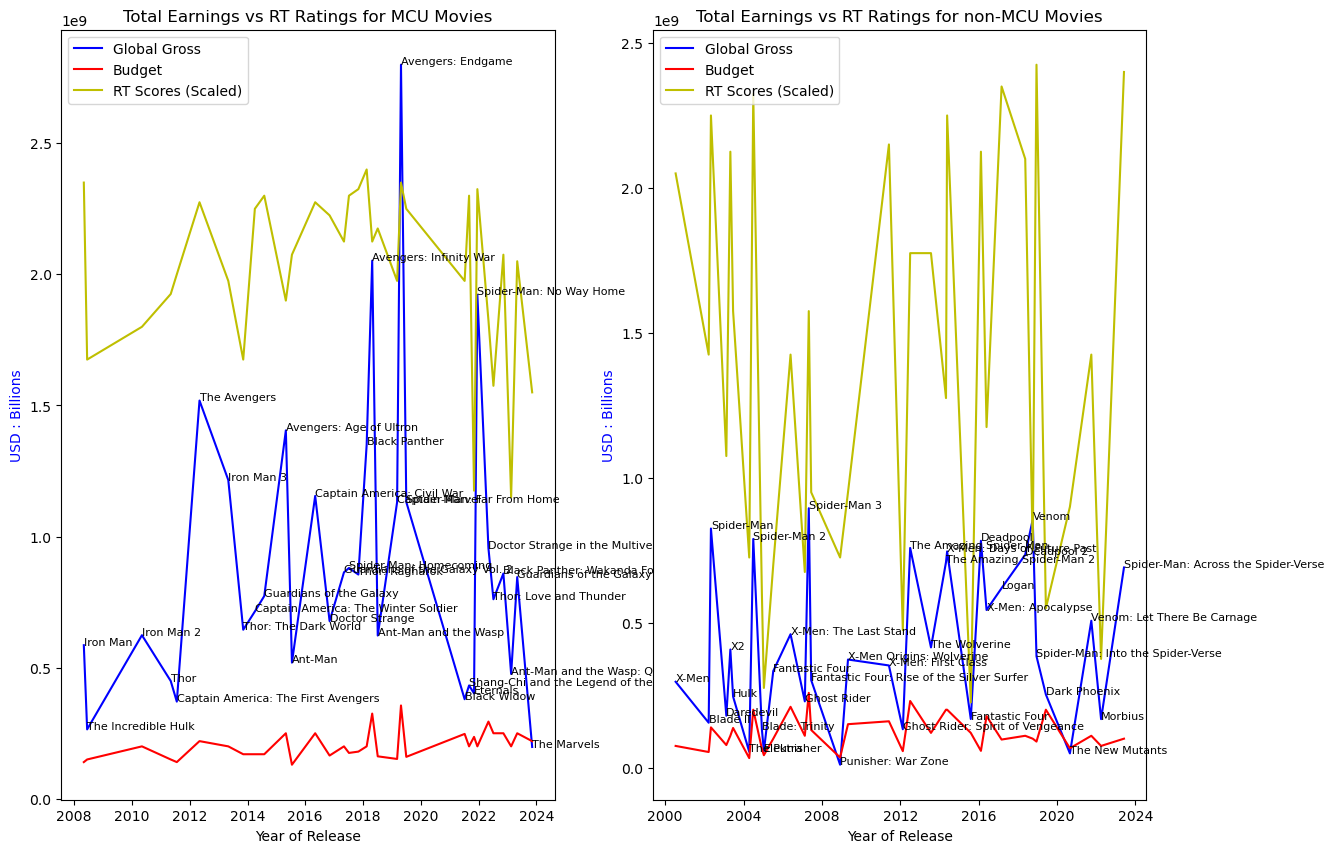

In [53]:
#Time for some subplots
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.plot(xm, ym1, "-b", label="Global Gross")
plt.plot(xm, ym2, "-r", label="Budget")
plt.plot(xm, ym3, "-y", label="RT Scores (Scaled)")
for i, txt in enumerate(nm):
    plt.annotate(txt, (xm[i], ym1[i]), size="8")
plt.legend(loc="upper left")
plt.xlabel("Year of Release")
plt.ylabel("USD : Billions", color='blue')
plt.title('Total Earnings vs RT Ratings for MCU Movies')

plt.subplot(1,2,2)
plt.plot(xnm, ynm1, "-b", label="Global Gross")
plt.plot(xnm, ynm2, "-r", label="Budget")
plt.plot(xnm, ynm3, "-y", label="RT Scores (Scaled)")
for i, txt in enumerate(nnm):
    plt.annotate(txt, (xnm[i], ynm1[i]), size="8")
plt.legend(loc="upper left")
plt.xlabel("Year of Release")
plt.ylabel("USD : Billions", color='blue')
plt.title('Total Earnings vs RT Ratings for non-MCU Movies')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x1000 with 0 Axes>

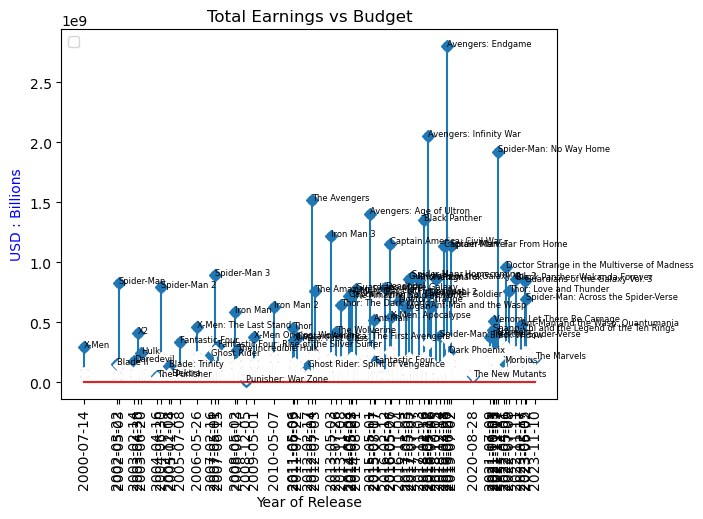

In [84]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.stem(x, y1, markerfmt ='D')
ax.stem(x, y2 , linefmt ='white', markerfmt ='D')
plt.scatter(x, y1, color='b')
plt.scatter(x, y2, color='r')
plt.xticks(x)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y1[i]), size="6")
plt.legend(loc="upper left")
plt.xlabel("Year of Release")
plt.ylabel("USD : Billions", color='blue')
plt.title('Total Earnings vs Budget')
plt.show()
#attempt at stacked vertical lines that show the difference between earnings and budget, could not get the line to go between
#y1 and y2, but the overlapping colors towards the bottom show some of the negative returns

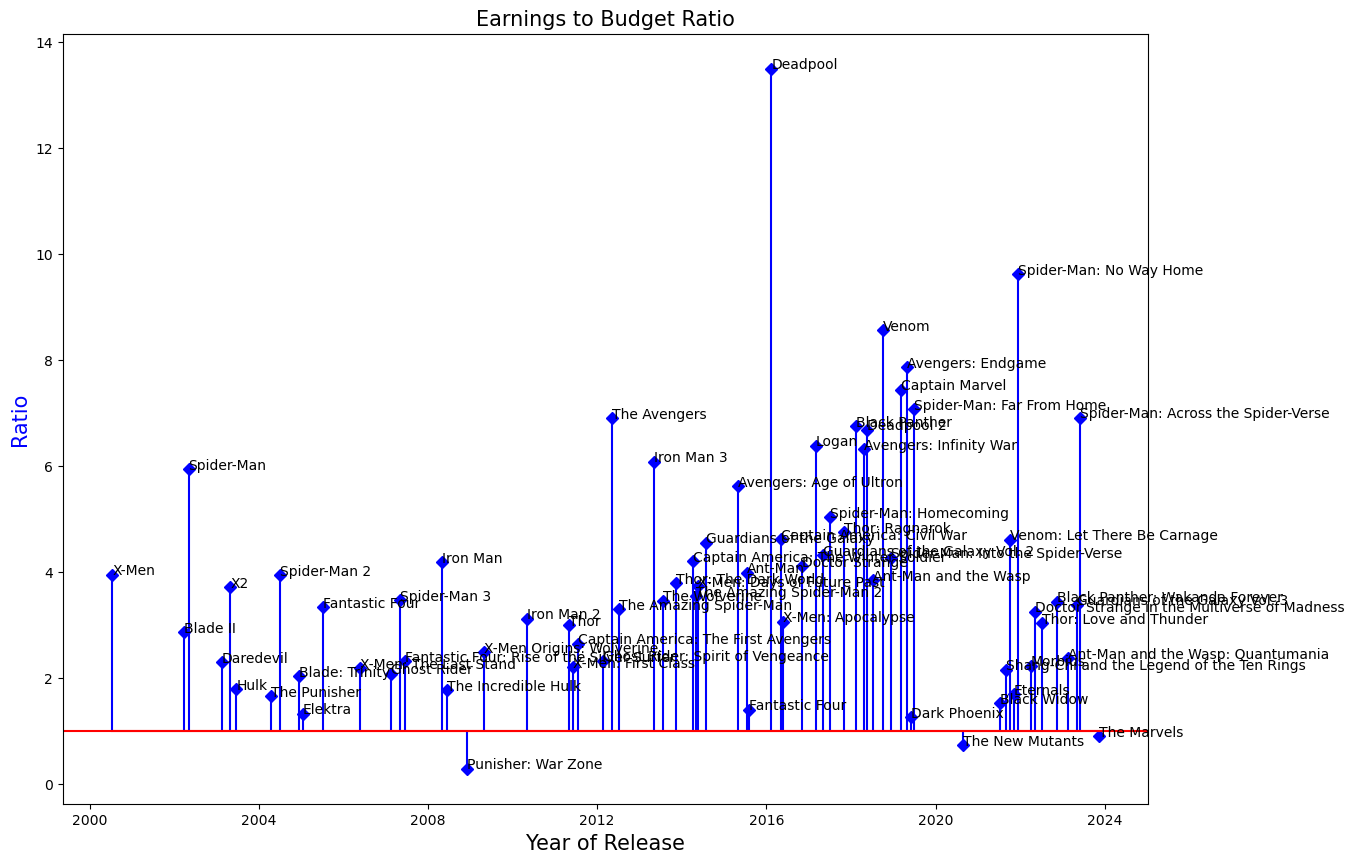

In [100]:
plt.figure(figsize=(14,10))
plt.stem(x, ygb, linefmt ='blue', markerfmt ='D', bottom = 1)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], ygb[i]), size="10")
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Earnings to Budget Ratio', size='15')
plt.xlabel("Year of Release", size='15')
plt.ylabel("Ratio", color='blue', size='15')
plt.show()

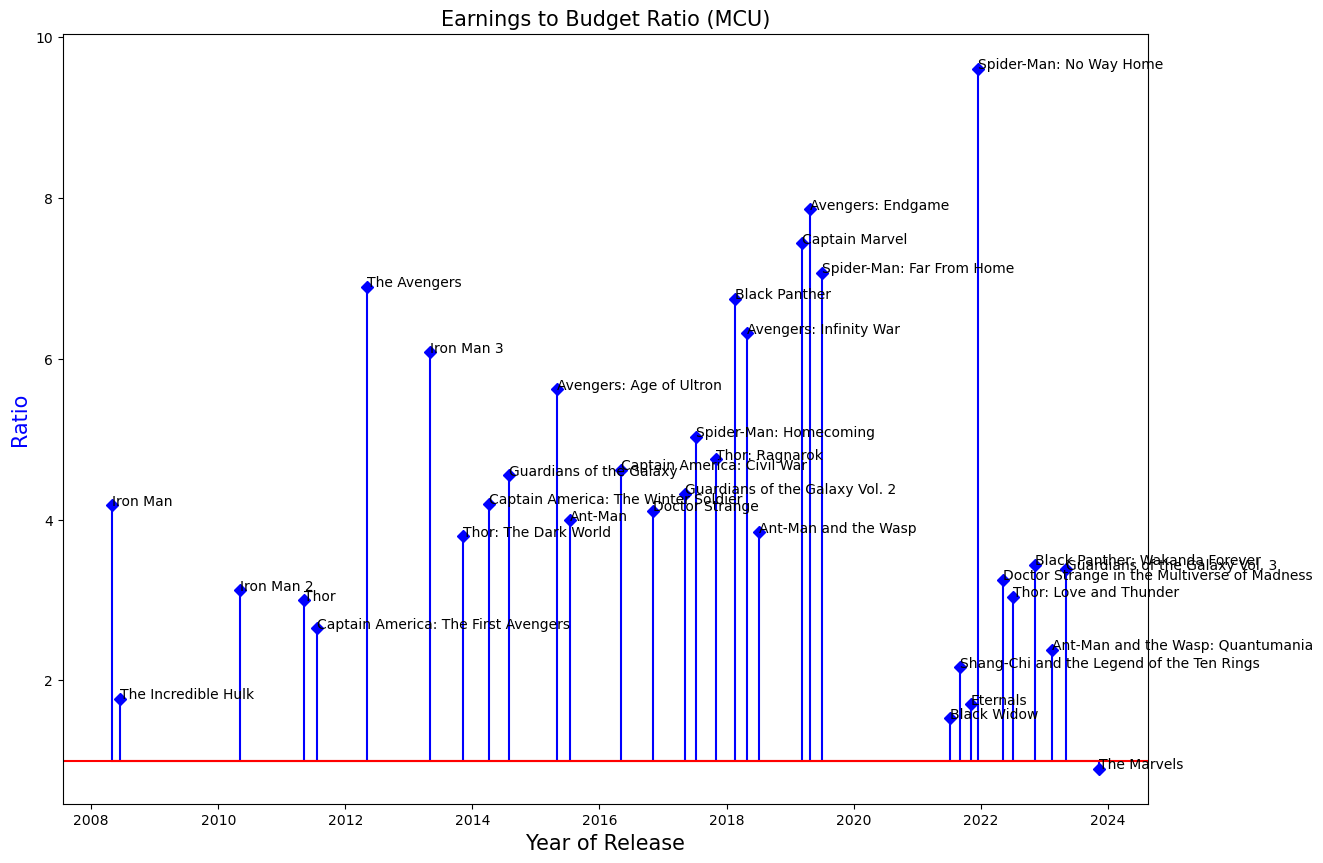

In [104]:
plt.figure(figsize=(14,10))
plt.stem(xm, ygbm, linefmt ='blue', markerfmt ='D', bottom = 1)
for i, txt in enumerate(nm):
    plt.annotate(txt, (xm[i], ygbm[i]), size="10")
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Earnings to Budget Ratio (MCU)', size='15')
plt.xlabel("Year of Release", size='15')
plt.ylabel("Ratio", color='blue', size='15')
plt.show()

In [ ]:
#After much experimenting, these will have to be the final figures
#This data set was a bit unruly, so I did what I could